In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid',
                   'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']


In [2]:
import numpy as np
print(df_wine.head())
print('Class labels', np.unique(df_wine['Class label']))


   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

In [6]:
from sklearn.model_selection import train_test_split
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train[0, :]

array([  1.37100000e+01,   1.86000000e+00,   2.36000000e+00,
         1.66000000e+01,   1.01000000e+02,   2.61000000e+00,
         2.88000000e+00,   2.70000000e-01,   1.69000000e+00,
         3.80000000e+00,   1.11000000e+00,   4.00000000e+00,
         1.03500000e+03])

In [7]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

X_train_norm[0, :]

array([ 0.72043011,  0.20378151,  0.53763441,  0.30927835,  0.33695652,
        0.54316547,  0.73700306,  0.25      ,  0.40189873,  0.24068768,
        0.48717949,  1.        ,  0.5854251 ])

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Training Accuracy =', lr.score(X_train_std, y_train))
print('Testing Accuracy =', lr.score(X_test_std, y_test))
print('Intercept =', lr.intercept_)

Training Accuracy = 0.983870967742
Testing Accuracy = 0.981481481481
Intercept = [-0.38380744 -0.15805374 -0.70032473]


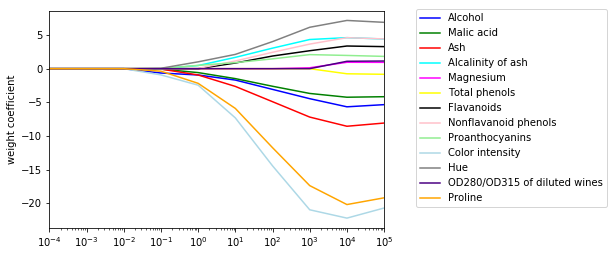

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6, dtype=float):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1],
             color=color)
# plt.axhline(0, color='black', linestyle='--', linewidth=2)
plt.xlim([10**(-4), 10**5])
plt.ylabel('weight coefficient')
plt.ylabel('weight coefficient')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()


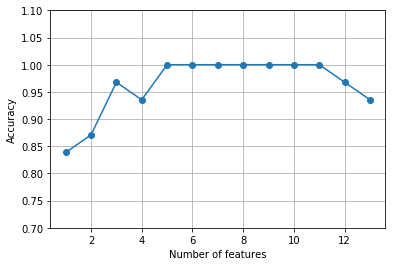

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from SBS import SBS

knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [13]:
k5 = list(sbs.subsets_[7])
print(df_wine.columns[1:][k5])

knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))


Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Flavanoids', 'Hue',
       'Proline'],
      dtype='object')
Training accuracy: 0.983870967742
Test accuracy: 0.944444444444
Training accuracy: 0.975806451613
Test accuracy: 0.981481481481


In [15]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=0)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


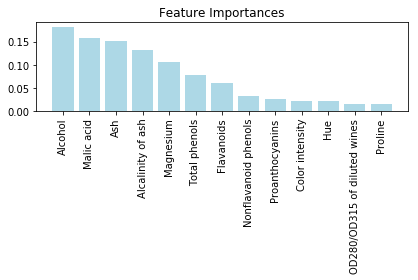

In [16]:
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()